In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

In [2]:
from pypoptim.algorythm import Solution
from pypoptim.algorythm.ga import GA

# Simple example

In [3]:
def error(x):
    return np.sum(x**2)

class Sol(Solution):
    
    def update(self):
        self._y = error(self.x)
        
    def is_valid(self):
        return self.is_updated()

In [4]:
sol = Sol([2])
sol.update()
sol

Solution = {
    x    = [2.],
    y    = 4.0,
    data = {}
}

In [5]:
bounds = np.array([[-4, 2],
                   [-1, 5]])

ga_optim = GA(Sol, bounds)
ga_optim

GA:
[bounds_lower bounds_upper gammas mask_log_10_scale]
[[-4.  2.  1.  0.]
 [-1.  5.  1.  0.]]
mutation_rate: 1.0
crossover_rate: 1.0
selection_force: 2
keys_data_transmit: []

  0%|          | 0/10 [00:00<?, ?it/s]

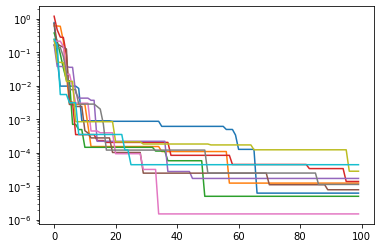

In [6]:
n_solutions = 25
n_elites = 5
n_epochs = 100

for _ in tqdm(range(10)):
    
    population = ga_optim.generate_population(n_solutions)

    loss = []

    for i in range(n_epochs):
        
        ga_optim.update_population(population)
            
        loss.append(min(population).y)
            
        elites  = ga_optim.get_elites(population, n_elites)
        mutants = ga_optim.get_mutants(population, n_solutions - n_elites)
        
        population = elites + mutants

    plt.semilogy(loss)

In [7]:
ga_optim.update_population(population)
X = np.array([sol.x for sol in sorted(population)])
Y = np.array([sol.y for sol in sorted(population)])

In [8]:
X[0]

array([0.00127293, 0.00648514])

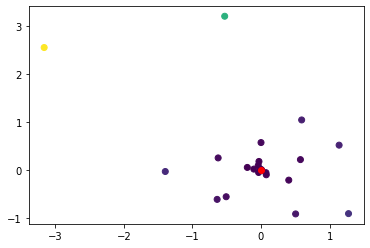

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.plot(X[0, 0], X[0, 1], 'or')

# All at once

In [10]:
n_solutions = 10
n_elites = 1
n_epochs = 10

population = ga_optim.run(n_solutions, n_epochs, n_elites)
population

[Solution = {
     x    = [ 0.04558162 -0.08111481],
     y    = 0.008657295681152751,
     data = {}
 },
 Solution = {
     x    = [ 0.9397779  -0.95531284],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [ 0.68895838 -0.40308835],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [1.66759433 0.32633004],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [0.23693628 0.13283873],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [ 1.17729221 -0.17431006],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [-0.47231318  0.51632085],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [-0.64449676  0.92592258],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [ 0.8640742  -0.29969043],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [1.27856651 0.65930897],
     y    = None,
     data = {}
 }]